# Keras_imdb_binary_classification_example

## Import and prepare data

In [2]:
import tensorflow as tf

(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.imdb.load_data(num_words = 5000)

In [3]:
import numpy as np

def vectorize_sequences(sequences, dimension = 5000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [4]:
y_train = np.array(train_labels).astype('float32')
y_test = np.array(test_labels).astype('float32')

In [5]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

## Build and train NN

In [6]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(16, activation = 'relu', input_shape = (5000,)))
model.add(tf.keras.layers.Dense(16, activation = 'relu'))
model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))

In [7]:
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])

In [8]:
num_epochs = 20
history = model.fit(partial_x_train, partial_y_train,epochs = num_epochs, batch_size = 512, validation_data = (x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 11s 729us/step - loss: 0.5099 - acc: 0.7885 - val_loss: 0.3979 - val_acc: 0.8545
Epoch 2/20
15000/15000 [==============================] - 2s 130us/step - loss: 0.3259 - acc: 0.8875 - val_loss: 0.3170 - val_acc: 0.8827
Epoch 3/20
15000/15000 [==============================] - 2s 126us/step - loss: 0.2533 - acc: 0.9116 - val_loss: 0.2944 - val_acc: 0.8840
Epoch 4/20
15000/15000 [==============================] - 2s 130us/step - loss: 0.2163 - acc: 0.9213 - val_loss: 0.2854 - val_acc: 0.8846
Epoch 5/20
15000/15000 [==============================] - 2s 150us/step - loss: 0.1886 - acc: 0.9310 - val_loss: 0.2840 - val_acc: 0.8863
Epoch 6/20
15000/15000 [==============================] - 2s 129us/step - loss: 0.1718 - acc: 0.9387 - val_loss: 0.2964 - val_acc: 0.8814
Epoch 7/20
15000/15000 [==============================] - 2s 134us/step - loss: 0.1526 - acc: 0.9478 - val_loss: 0.3045 -

## Visualization

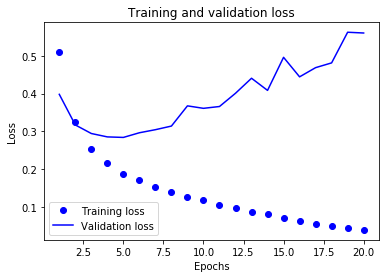

In [10]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, num_epochs + 1)

plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

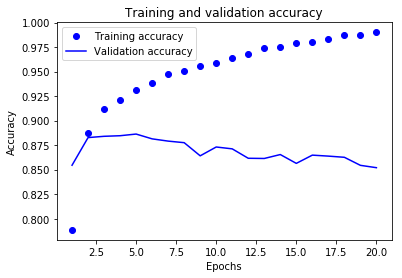

In [14]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()